# 딥러닝 만드는 순서

### 데이터 준비 - 딥러닝 네트워크 설계 - 학습 -테스트(평가)  


# 데이터  준비


#### 텐서플로우(TensorFlow)의 표준 API인 tf.keras의 Sequential API를 이용

텐서플로우 : 텐서플로(TensorFlow)는 구글(Google)에서 만든, 딥러닝 프로그램을 쉽게 구현할 수 있도록 다양한 기능을 제공해주는 라이브러리

API : 프로그램들이 서로 상호작용하는 것을 도와주는 매개체

Keras : Tensorflow 위에서 동작한다. Keras가 따로 존재하는 이유는 Tensorflow가 초보자에게는 매우 어렵기 때문에 좀더 사용자 친화적인 Keras의 필요성 생김

Sequential API : https://www.tensorflow.org/guide/keras/sequential_model?hl=ko

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
60000


**tensorflow** 불러올건데 이제부터 **tf**라 부르겠다.  
**tensorflow**에서 **keras** 가져올거다.  
  
**numpy**를 이제부터 **np**라 부르겠다.  

**numpy** : 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리이다. 빠른 수학적 연산을 위해 사용

**matplotlib.pylot**는 **plt**라 부르겠음.  

**matplotlib.pyplot** : 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리  

**Dataset** : 수많은 데이터를 모아둔 것  


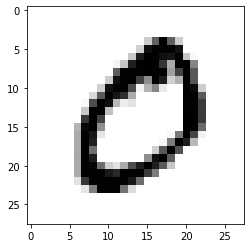

In [3]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

imshow 함수 : 이미지 출력하기  
cmap = plt.cm.binary : binary 컬러 맵을 사용해서 그린다.  


In [4]:
print(y_train[1])

0


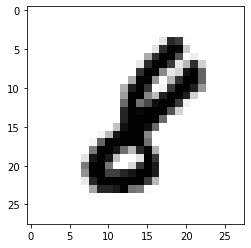

10002 번째 이미지의 숫자는 바로  8 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10001     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

  
Index=10000은 3  
Index=20000은 5  
Index=30000은 3  
Index=50000은 3

  
  
#### (x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들임.  
  


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_test.shape)

(10000, 28, 28)


train 및 test data 구성 중 Validation set이 필요한 이유
  
모델 스스로 학습 상태를 확인하고 학습 방법을 바꾸거나 학습을 중단할 수 있음  
1. 학습 방법을 바꾼 후 훈련셋으로 다시 학습, 이후 검증셋 사용  
2. 얼마정도 반복 학습이 좋을지 정하기 위해 검증셋 사용(Epochs)  
  
**언더피팅(Underfitting)** : 아직 학습이 덜 된 상태, 학습을 더 하면 성능이 높아짐  
**오버피팅(Overfitting)** : 공통특성 이외에 지엽적인 특성까지 반영하여 새로운 데이터는 예                       측하지 못하는 모델

In [8]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


np.min : 최소값  
np.max : 최대값

In [9]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


바로 위의 행동과 완전히 똑같다. 다만 X_train_norm이 새롭게 나온 것 뿐.

# 딥러닝 네트워크 설계하기

뭐 엄청 많이 한거 같은데 겨우 데이터 준비가 끝난거다. 이제 딥러닝 네트워크를 설계해보자.

**텐서플로우 케라스(tf.keras)에서 Sequential API**라는 방법을 사용

다음의 코드는 **tf.keras의 Sequential API를 이용하여 LeNet**이라는 딥러닝 네트워크를 설계한 예

**LeNet** : https://m.blog.naver.com/laonple/221218707503

읽어보니 자세한건 이해가 안되고 LeNet이 CNN 알고리즘 중 하나인 것만 알고간다.

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


링크 걸어둔 블로그 가보면 LeNet의 구조를 보여주는데 총 7과정이 있다. 따라서 7줄의 코드가 있는걸로 보인다.

Conv2D : 16개의 필터(특징), (3,3)행렬, relu=rectifier함수를 활성화 함수로 설정(은닉층) 
MaxPool2D(2,2) : pooling에 사용할 filter의 크기를 정한다.  
Dense : 32개의 출력 뉴런, 이 값이 클수록 복잡한 분류기 만든다.  
마지막 Dense : 결과적으로 분류해내야하는 클래스

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 딥러닝 네트워크 학습시키기

 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)

In [12]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


"Before Reshape - x_train_norm shape: {}" 이거는 문자열  
{}부분을 .fomat 뒤에 있는 말로 포맷팅 한다.  
사실 이 부분의 코드가 잘 이해가 되지 않는다.

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1908 - accuracy: 0.9414
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0626 - accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0367 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0296 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0251 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0143 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.011

**compile** : 모델을 학습시키기 위한 학습과정을 설정  
  
모델의 학습 중에 역전파를 통한 가중치 최적화를 위한 기울기 방향에 대한 경사하강을 위한 방법으로 Adam을 사용  
  
 손실함수로 다중 분류의 Cross Entropy Error인 ‘sparse_categorical_crossentropy’를 지정  
   
 모델 평가를 위한 평가 지표로 ‘accuracy’를 지정
    

**fit** : 정해진 수의 세대에 걸쳐 모델을 학습시킵니다  
  
https://keras.io/ko/models/model/

# 얼마나 잘 만들었는지 확인하기

위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것

In [21]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0472 - accuracy: 0.9899
test_loss: 0.04718007147312164 
test_accuracy: 0.9898999929428101


verbose = 학습 중 출력되는 문구를 설정합니다. 얼마나 자세하게 정보를 표시할 것인가를 지정
- 0 : 아무 것도 출력하지 않습니다.
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
- 2 : 미니 배치마다 손실 정보를 출력합니다.

##### 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자

model.evaluate() 대신 model.predict()를 사용하면 **model이 입력값을 보고 실제로 추론한 확률분포를 출력**할 수 있습니다.

In [22]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.4070589e-14 1.8705704e-15 8.3396152e-08 4.6397118e-12 1.1648077e-10
 9.5931164e-14 6.0840743e-24 9.9999988e-01 4.4913969e-13 3.1969739e-11]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


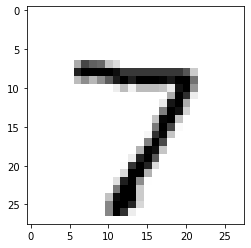

In [23]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

imshow를 사용하면 눈으로 확인이 가능하다.

예측확률분포: [7.1798784e-01 5.7975954e-21 3.4506679e-14 2.2829373e-10 1.1225805e-17
 2.4942378e-06 2.8200969e-01 9.3240639e-20 1.3231051e-08 1.7259926e-09]
라벨: 6, 예측결과: 0


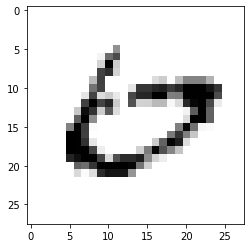

예측확률분포: [7.4695547e-19 5.3791264e-14 1.1188242e-14 6.6531375e-14 4.5705222e-02
 8.7896143e-07 3.3193720e-15 6.1026341e-13 2.0947440e-11 9.5429391e-01]
라벨: 4, 예측결과: 9


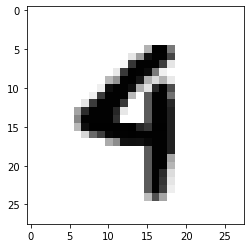

예측확률분포: [8.03399507e-06 7.93165267e-01 3.75958564e-07 3.88952370e-10
 3.68362853e-05 2.86759132e-06 2.06629306e-01 4.54363374e-08
 1.57269576e-04 1.10561855e-11]
라벨: 6, 예측결과: 1


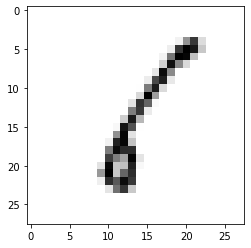

예측확률분포: [2.9009203e-07 3.4603160e-12 2.1294455e-12 1.2418674e-04 1.6223141e-10
 9.9947053e-01 5.4347760e-15 8.0376766e-10 1.8500646e-04 2.1998552e-04]
라벨: 9, 예측결과: 5


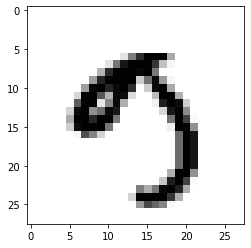

예측확률분포: [7.2738490e-06 8.3706291e-05 1.2913591e-05 1.3087723e-05 5.9156711e-03
 5.7458605e-05 1.5445692e-10 9.8120129e-01 3.0018398e-06 1.2705617e-02]
라벨: 9, 예측결과: 7


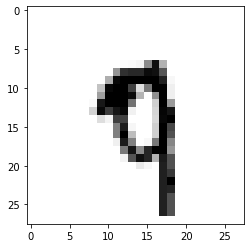

In [24]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

예측확률 분포 [1, 2, 3, 4, 5, 6, 7, 8, 9,]에 대한 확률  

Aiffel 노드의 설명을 보면 model이 추론 결과에 대해 혼란스러워 한다는데 어떤 이유로 그렇게 생각하는걸까? 확률값이 비교적 균등해서 그런걸까?.

# 더 좋은 네트워크 만들어 보기

네트워크 구조 자체를 바꾸지 않고 하이퍼파라미터들을 바꿔서 인식률을 높여볼 수 있다.  
1. Con2D 레이어의 입력 이미지의 특징수 늘려보기
2. Dense 레이어에서 뉴런수를 바꿔보기
3. Epoch 값을 변경해보기

In [16]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

약간 헷갈리는 부분이 Aiffel 노드 페이지에서 같은 코드를 돌리면 0.99가 나오는데 쥬피터 노트북에서 돌리면 0.987이 나온다.  
쥬피터 노트북을 기준으로 하면 **n_channel_1=32 n_channel_2=64**으로 바꾸니 **total accuracy**가 **0.9919**가 나왔다.

# 프로젝트: 가위바위보 분류기 만들기

데이터 만들기 - 각 800장씩 총 2400장

In [58]:
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [59]:
import os
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissors"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissors
가위 이미지 resize 완료!


In [60]:
import os
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [61]:
import os
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


실제로 확인해보면 사이즈가 28X28로 바뀌어 있다.

In [62]:
def load_data(img_path):
    
    number_of_data=2400   
    img_size=28
    color=3
   
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2400 입니다.
x_train shape: (2400, 28, 28, 3)
y_train shape: (2400,)


In [75]:
def load_data(img_path):
    
    number_of_data=900   
    img_size=28
    color=3
   
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0   
        idx=idx+1

    for file in glob.iglob(img_path+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=1   
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2   
        idx=idx+1
        
    print("시험데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (2400, 28, 28, 3)
y_test shape: (2400,)


라벨:  0


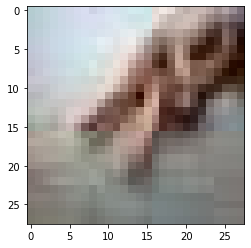

In [63]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

[0]은 가위를 의미한다.

In [64]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


(28, 28, 1)에서 마지막 1을 3으로 바꾸는 것에 주의해야 한다. 가위바위보 파일은 색깔이 있어 RGB 3으로 설정해야 한다.

In [68]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape( 2400, 28, 28, 3)


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))


Before Reshape - x_train_norm shape: (2400, 28, 28, 3)
After Reshape - x_train_reshaped shape: (2400, 28, 28, 3)


In [69]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
75/75 [==============================] - 0s 1ms/step - loss: 1.2139 - accuracy: 0.3462
Epoch 2/10
75/75 [==============================] - 0s 1ms/step - loss: 1.0155 - accuracy: 0.4771
Epoch 3/10
75/75 [==============================] - 0s 1ms/step - loss: 0.8679 - accuracy: 0.6308
Epoch 4/10
75/75 [==============================] - 0s 1ms/step - loss: 0.7393 - accuracy: 0.7029
Epoch 5/10
75/75 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.7708
Epoch 6/10
75/75 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.8092
Epoch 7/10
75/75 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8483
Epoch 8/10
75/75 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8871
Epoch 9/10
75/75 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.9087
Epoch 10/10
75/75 [==============================] - 0s 1ms/step - loss: 0.2591 - accuracy: 0.9208
